# DSCI 503 – Project 02
Christopher Hinton

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

In [2]:
# This function will randomly generate a simulated sequence of daily stock prices
def simulate_stock(start, rate, vol, days):
    return_val = []
    return_val.append(start)
    start = [start]
    start = np.array(start)
    daily_rate = rate / 252
    daily_vol = vol / (252 ** 0.5)
    
    daily_yields = np.random.normal(daily_rate, daily_vol, days)

    cumulative_yields = np.cumsum(daily_yields)
    
    daily_multipliers = np.exp(cumulative_yields)
    
    daily_multipliers = np.array([round(x * start[0], 2) for x in daily_multipliers])
    
    return_vals = np.concatenate((start, daily_multipliers), axis=0)
    
    return return_vals



#### Testing Part A simulate_stock function



Text(0.5, 1.0, 'Stock Simulator')

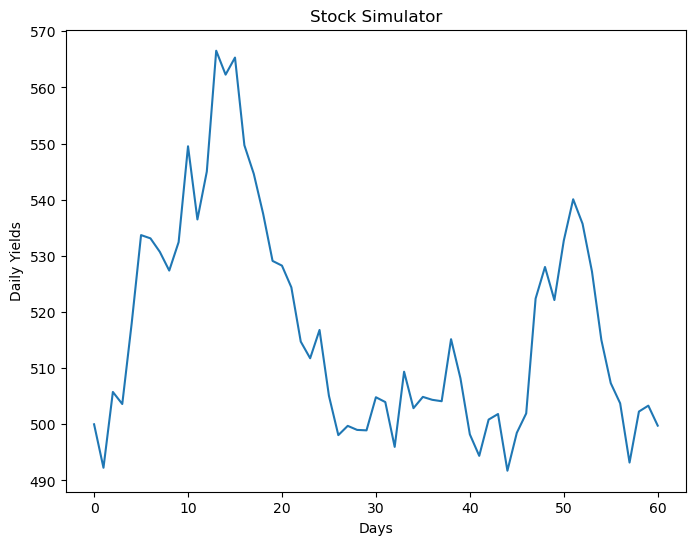

In [3]:
stock_sims = simulate_stock(500, 0.08, 0.3, 60)

np.random.seed(1)
fig = plt.figure(figsize=[8,6])
#stock_range = [stock_sims[0],max(stock_sims)]
#print(stock_sims[0], max(stock_sims), stock_sims[-1])
plt.plot(stock_sims)
plt.xlabel("Days")
plt.ylabel("Daily Yields")
plt.title("Stock Simulator")

## Part B:  Annual Yield Function


In [4]:
# This function should take one array parameter,and return the annual yield for the stock over the simulated period.
def find_yield(run):
    annual_yield = mt.log(run[-1] / run[0]) * (252 / (len(run) - 1))

    return round(annual_yield, 4)


#### The next cell tests Part B function with the run from Part A

In [5]:
print(find_yield(stock_sims))

-0.002


#### The next cell will explore the potential variability in our simulated runs by creating and plotting 25 simulated runs on a line plot.

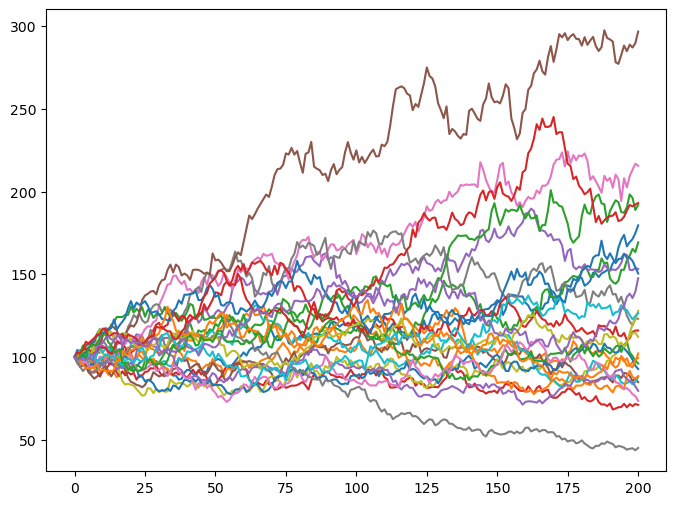

In [6]:
annual_yield_list = []
plt.figure(figsize=[8,6])

for i in range(25):
    temp_run = simulate_stock(100, 0.06, 0.4, 200)
    annual_yield_list.append(find_yield(temp_run))
    plt.plot(temp_run)

#### The next cell will display annual yields from the 25 simulated runs.

In [7]:
print(annual_yield_list)

[0.7375, 0.0266, 0.663, -0.4319, 0.5371, -0.2086, 0.9679, 0.2618, 0.3093, -0.1628, -0.0956, -0.1546, -0.0517, 0.1869, -0.2887, 1.3704, -0.3891, -1.0067, 0.1443, 0.2954, 0.5144, -0.0072, 0.8206, 0.8291, 0.4901]


## Part C: Finding Seeds that Generate Specific Outcomes
In Part C we will explore how different seeds can lead to specific outcomes.

In the cell below, Stock A has the highest simulated final price.

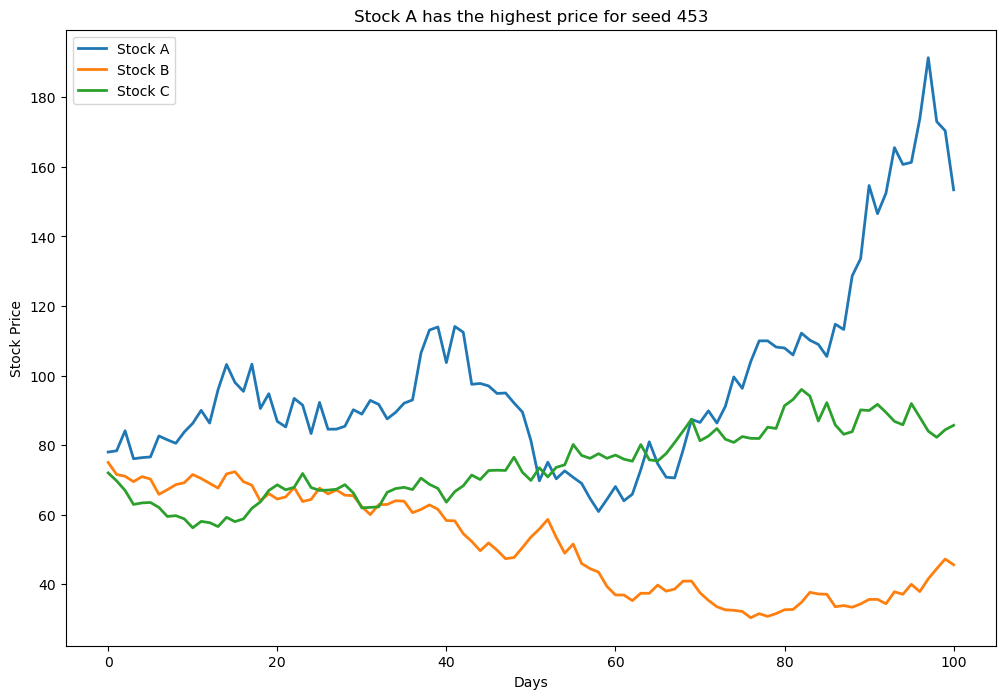

In [8]:
# Explore seed 453
np.random.seed(453)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

# Show stock A-C in line plot
plt.figure(figsize=[12,8])
plt.plot(stock_A, lw=2, label="Stock A")
plt.plot(stock_B, lw=2, label="Stock B")
plt.plot(stock_C, lw=2, label="Stock C")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock A has the highest price for seed 453")
plt.show()

In the cell below, Stock B has the highest simulated final price.

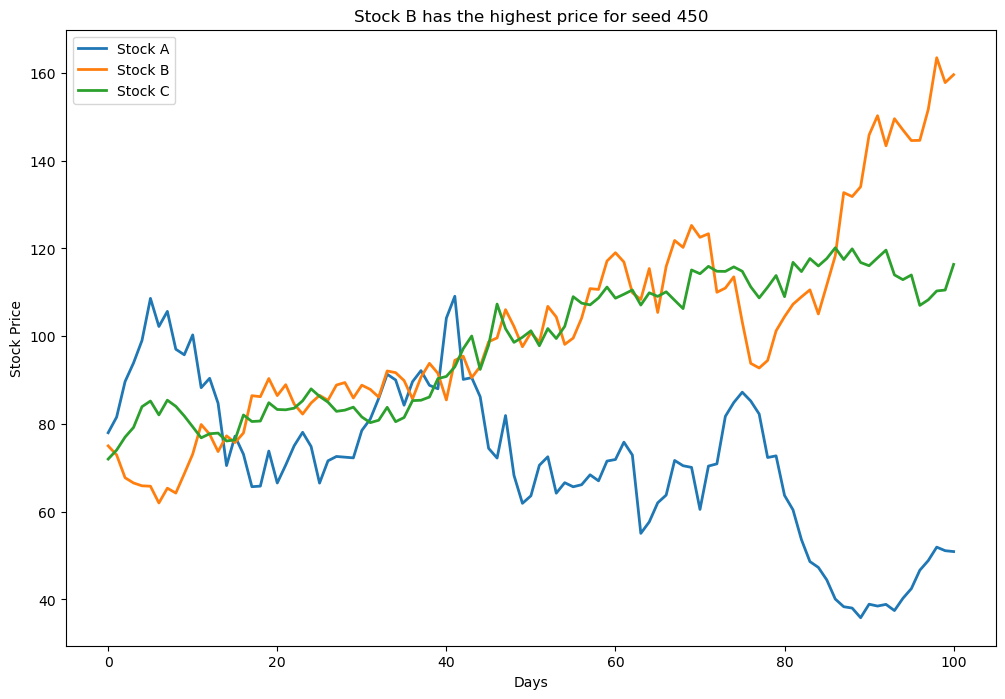

In [9]:
# Explore seed 450
np.random.seed(450)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

# Show stock A-C in line plot
plt.figure(figsize=[12,8])
plt.plot(stock_A, lw=2, label="Stock A")
plt.plot(stock_B, lw=2, label="Stock B")
plt.plot(stock_C, lw=2, label="Stock C")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock B has the highest price for seed 450")

plt.show()

In the cell below, Stock C has the highest simulated final price.

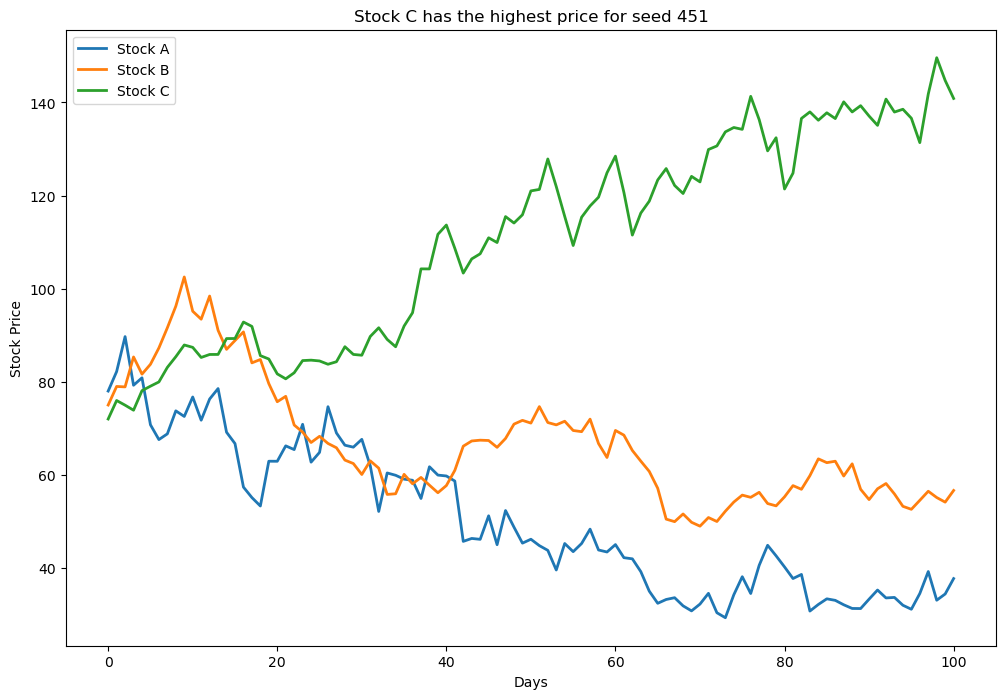

In [10]:
# Explore seed 451
np.random.seed(451)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

# Show stock A-C in line plot
plt.figure(figsize=[12,8])
plt.plot(stock_A, lw=2, label="Stock A")
plt.plot(stock_B, lw=2, label="Stock B")
plt.plot(stock_C, lw=2, label="Stock C")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock C has the highest price for seed 451")

plt.show()

## Part D: Monte Carlo Simulation
In Part D we will use the Monte Carlo simulation to estimate probabilities relating to the outcome of a certain event.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for i in range(num_runs):
        # Simulate a stock run
        temp_run = simulate_stock(start, rate, vol, days)
        # determine the final prices and append it to final_prices
        temp_final_price = temp_run[-1]
        final_prices.append(temp_final_price)
        # determine the annual yield for the simulated run and append in into annual_yields
        temp_annual_yield = find_yield(temp_run)
        annual_yields.append(temp_annual_yield)
        
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices, annual_yields

Now I will test the function above with a specific seed.

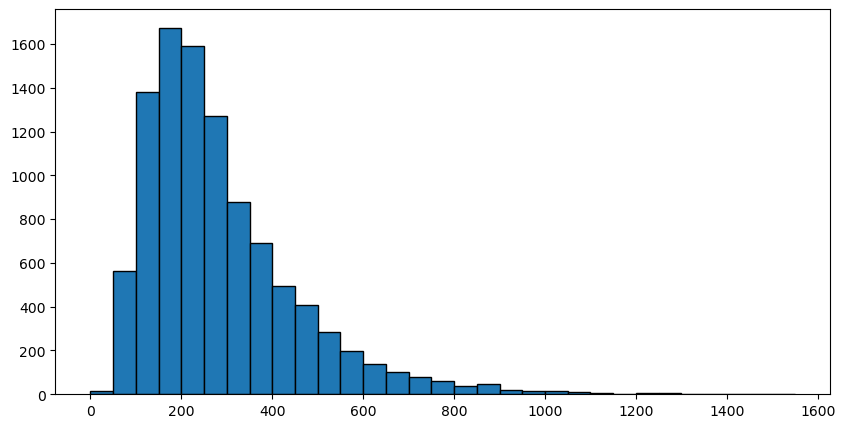

In [12]:
np.random.seed(1)
result = monte_carlo(200, 0.10, 0.4, 500, 10000)

plt.figure(figsize=[10, 5])
plt.hist(result[0], bins=np.arange(0, 1600, 50), edgecolor="black")
plt.show()


I will now display the 10thh, 25th, 50th, 75th, and 90th percentiles of the simulated final prices

In [13]:
print(f"10th percentile: {np.percentile(result[0], 10):.2f}")
print(f"25th percentile: {np.percentile(result[0], 25):.2f}")
print(f"50th percentile: {np.percentile(result[0], 50):.2f}")
print(f"75th percentile: {np.percentile(result[0], 75):.2f}")
print(f"90th percentile: {np.percentile(result[0], 90):.2f}")


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
In Part E we will explore the effects of volitility on two simulated stock prices.

In [14]:
np.random.seed(1)
sim_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
sim_B = monte_carlo(100, 0.12, 0.7, 150, 10000)

print(f"Average Annual Yield for A over 10000 runs: {np.mean(sim_A):.4f}")
print(f"Average Annual Yield for B over 10000 runs: {np.mean(sim_B):.4f}")

Average Annual Yield for A over 10000 runs: 55.2746
Average Annual Yield for B over 10000 runs: 61.9189


I will now plot the final prices of these simulations on a histogram. 

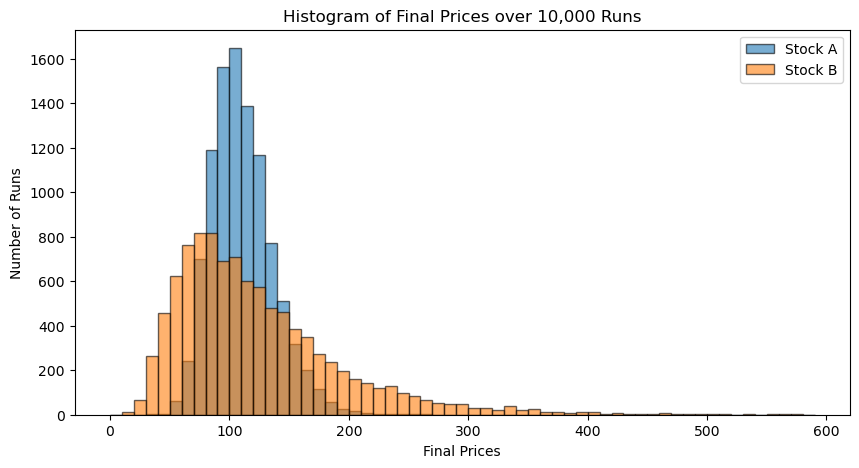

In [15]:
plt.figure(figsize=[10,5])
plt.hist(sim_A[0], bins=np.arange(0,600, 10), alpha=0.6, edgecolor="black", label="Stock A")
plt.hist(sim_B[0], bins=np.arange(0,600, 10), alpha=0.6, edgecolor="black", label="Stock B")
plt.legend()
plt.title("Histogram of Final Prices over 10,000 Runs")
plt.xlabel("Final Prices")
plt.ylabel("Number of Runs")
plt.show()

## Part F: Comparing Two Stocks
In Pat F I will use the Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with
different parameters. 

In [16]:
np.random.seed(1)
sim_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
sim_B = monte_carlo(120, 0.05, 0.5, 252, 10000)

count_A = []
count_B = []
for i in range(len(sim_A[0])):
    if sim_A[0][i] > sim_B[0][i]:
        count_A.append(sim_A[0][i])
    else:
        count_B.append(sim_A[0][i])

count_A = np.array(count_A)
count_B = np.array(count_B)

num_A_higher = len(count_A)
#print("Count_A: type", type(count_A), "Count_A[0] type:", type(count_A[0]))

prop_A_higher = num_A_higher / len(sim_A[0])

prop_A_higher_over150 = len(count_A[count_A >= 149]) / len(sim_A[0])
prop_B_higher_over150 = len(count_B[count_B >= 149]) / len(sim_A[0])

prop_A_higher_under100 = len(count_A[count_A <= 101]) / len(sim_A[0])
prop_B_higher_under100 = len(count_B[count_B <= 101]) / len(sim_A[0])

print(f"""Proportions of runs in which...
-------------------------------
A ends above B:   {prop_A_higher:.4f}
A ends above 150: {prop_A_higher_over150:.4f}
B ends above 150: {prop_B_higher_over150:.4f}
A ends below 100: {prop_A_higher_under100:.4f}
B ends below 100: {prop_B_higher_under100:.4f}""")

Proportions of runs in which...
-------------------------------
A ends above B:   0.5206
A ends above 150: 0.1742
B ends above 150: 0.0706
A ends below 100: 0.0270
B ends below 100: 0.0770


## Part G: Expected Call Payoff
Lastly, I will explore how the Monte Carlo simulation can be beneficial when considering a call option. 

In [17]:
np.random.seed(1)
sim_A = monte_carlo(200, 0.11, 0.4, 225, 10000)

call_option = [sim_A[0][i] - 225 for i in range(len(sim_A[0]))]
call_option = np.where(np.array(call_option) > 0, call_option, 0)
mean_run = np.mean(call_option)
print(f"The average call payoff over the 10,000 runs: {mean_run}")

The average call payoff over the 10,000 runs: 40.654454
